In [47]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

![AI Areas - CNN](assets\cnn.png)

### O que são Redes Neurais Convolucionais (Convolutional Neural Networks)?

Redes Neurais Convolucionais (CNNs) são um tipo de rede neural projetada para processar dados com uma estrutura de grade, como imagens. Elas utilizam operações de convolução para extrair características importantes, reduzindo a dimensionalidade dos dados e mantendo a informação espacial. As CNNs são amplamente utilizadas em tarefas de visão computacional, como reconhecimento de imagens e detecção de objetos.

![convolutional neural network](assets\CNN1.png)

#### Porque usar CNNs?

Rede Neural de Regressão Linear:

![Logistic Regression Image Flatten](assets\lr-image.png)

In [48]:
# Função para carregar e mostrar uma imagem
def load_and_display_image(image_path):
    # Carregar a imagem em escala de cinza
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Mostrar a imagem
    plt.imshow(image)
    plt.show()
    
    return image

# Função para achatar a imagem e mostrar o shape
def flatten_image(image):
    flattened = image.flatten()
    print(f"Shape original: {image.shape}")
    print(f"Shape após flattening: {flattened.shape}")
    return flattened

In [49]:
# Função para carregar uma imagem RGB e plotar os 3 canais
def load_and_plot_channels(image_path):
    # Carregar a imagem em RGB
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converter de BGR para RGB
    print(f"Image shape: {image_rgb.shape}")
    
    # Separar os canais de cor
    red_channel = image_rgb[:, :, 0]   # Canal vermelho
    green_channel = image_rgb[:, :, 1] # Canal verde
    blue_channel = image_rgb[:, :, 2]  # Canal azul
    
    # Criar subplots
    plt.figure(figsize=(15, 5))
    
    # Plotar canal vermelho
    plt.subplot(1, 3, 1)
    plt.imshow(red_channel, cmap='Reds')
    plt.title('Canal Vermelho')
    plt.axis('off')  # Remove os eixos

    # Plotar canal verde
    plt.subplot(1, 3, 2)
    plt.imshow(green_channel, cmap='Greens')
    plt.title('Canal Verde')
    plt.axis('off')  # Remove os eixos

    # Plotar canal azul
    plt.subplot(1, 3, 3)
    plt.imshow(blue_channel, cmap='Blues')
    plt.title('Canal Azul')
    plt.axis('off')  # Remove os eixos

    # Mostrar os plots
    plt.tight_layout()
    plt.show()

Imagem 64x64:


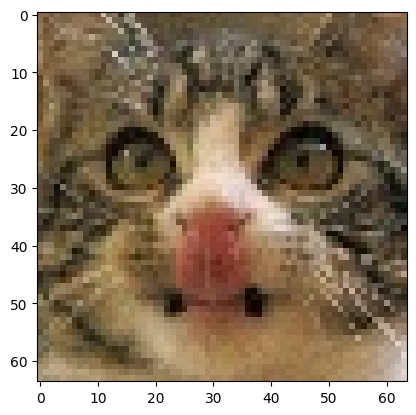

Shape original: (64, 64, 3)
Shape após flattening: (12288,)


In [50]:
# Carregar a imagem 64x64
print("Imagem 64x64:")
image_64 = load_and_display_image('D:/Codes/cnn/assets/64.jpg')
flattened_64 = flatten_image(image_64)

$64 \times 64 \times 3 = 12288$ Parametros

Image shape: (64, 64, 3)


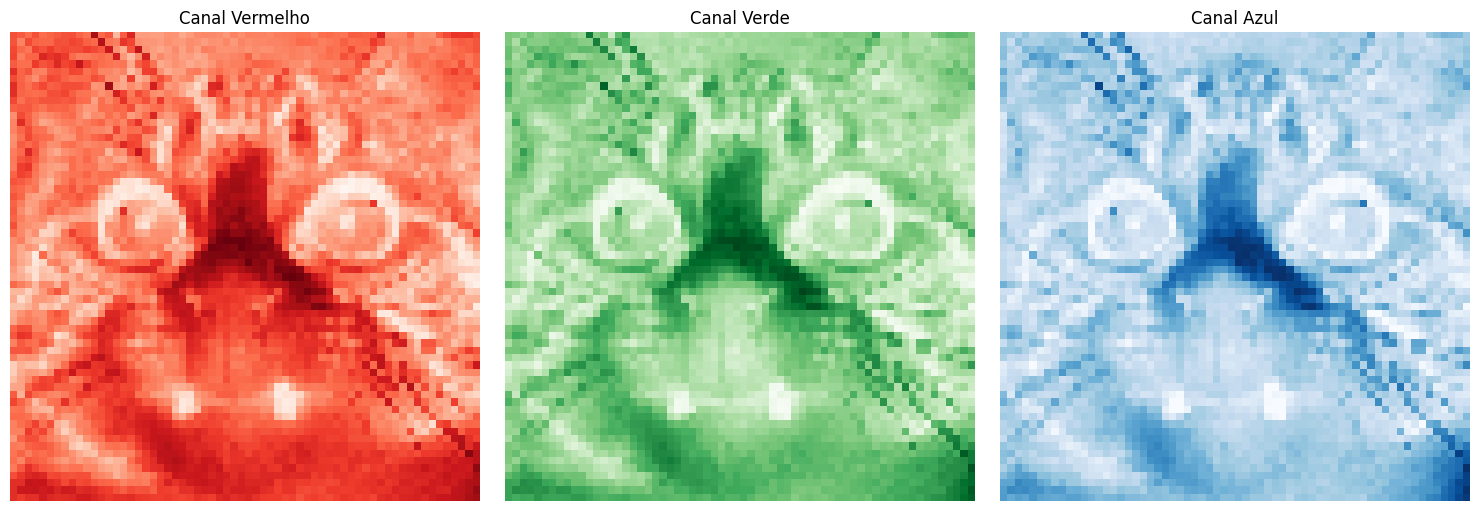

In [51]:
# Exemplo de uso da função
load_and_plot_channels('D:/Codes/cnn/assets/64.jpg')


Imagem 1024x1024:


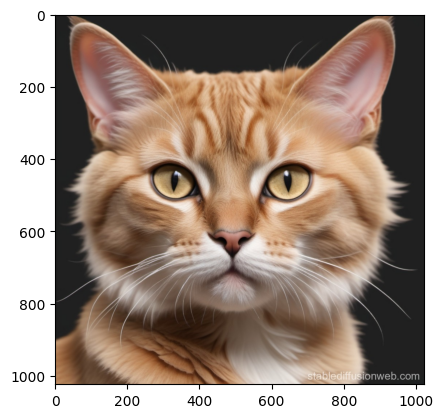

Shape original: (1024, 1024, 3)
Shape após flattening: (3145728,)


In [52]:
# Carregar a imagem 1024x1024
print("\nImagem 1024x1024:")
image_1024 = load_and_display_image('D:/Codes/cnn/assets/1024.jpg')
flattened_1024 = flatten_image(image_1024)

$
1024 \times 1024 \times 3 = 3.145.728
$ Pesos (Weights)

$
4000 \times 4000 \times 3 = 48.000.000
$ Pesos (Weights)

Para uma Rede Neural Totalmente Conetada (Fully Connected/Dense), teria no mínimo 48.000.001 parametros para 1 nó apenas

# O que são convoluções?

<img src="assets\zoning-cat.png" alt="Imagem" width="200"/>

Suponha que temos uma matriz **input** $A$ de tamanho $6 \times 6$:

$$
A = \begin{bmatrix}
a_{11} & a_{12} & a_{13} & a_{14} & a_{15} & a_{16} \\
a_{21} & a_{22} & a_{23} & a_{24} & a_{25} & a_{26} \\
a_{31} & a_{32} & a_{33} & a_{34} & a_{35} & a_{36} \\
a_{41} & a_{42} & a_{43} & a_{44} & a_{45} & a_{46} \\
a_{51} & a_{52} & a_{53} & a_{54} & a_{55} & a_{56} \\
a_{61} & a_{62} & a_{63} & a_{64} & a_{65} & a_{66}
\end{bmatrix}
$$

E uma matriz $B$ chamada de **filtro ou kernel** de tamanho $3 \times 3$:

$$
B = \begin{bmatrix}
b_{11} & b_{12} & b_{13} \\
b_{21} & b_{22} & b_{23} \\
b_{31} & b_{32} & b_{33}
\end{bmatrix}
$$

O resultado da convolução $C$ **(output)** será uma matriz $4 \times 4$ (considerando um stride de 1 e sem padding):

$$
C = A * B = \begin{bmatrix}
c_{11} & c_{12} & c_{13} & c_{14} \\
c_{21} & c_{22} & c_{23} & c_{24} \\
c_{31} & c_{32} & c_{33} & c_{34} \\
c_{41} & c_{42} & c_{43} & c_{44}
\end{bmatrix}
$$

Onde cada elemento $c_{ij}$ é calculado como:

$$
c_{ij} = \sum_{m=1}^{3} \sum_{n=1}^{3} a_{(i+m-1)(j+n-1)} \cdot b_{mn}
$$


As três primeiras convoluções resultantes na matriz C são calculadas da seguinte forma:

1. **Para** $c_{11}$:

$$
c_{11} = \sum_{m=1}^{3} \sum_{n=1}^{3} a_{(1+m-1)(1+n-1)} \cdot b_{mn} = 
a_{11}b_{11} + a_{12}b_{12} + a_{13}b_{13} + 
a_{21}b_{21} + a_{22}b_{22} + a_{23}b_{23} + 
a_{31}b_{31} + a_{32}b_{32} + a_{33}b_{33}
$$

2. **Para** $c_{12}$:

$$
c_{12} = \sum_{m=1}^{3} \sum_{n=1}^{3} a_{(1+m-1)(2+n-1)} \cdot b_{mn} = 
a_{11}b_{11} + a_{12}b_{12} + a_{13}b_{13} + 
a_{21}b_{21} + a_{22}b_{22} + a_{23}b_{23} + 
a_{31}b_{31} + a_{32}b_{32} + a_{33}b_{33}
$$

3. **Para** $c_{13}$:

$$
c_{13} = \sum_{m=1}^{3} \sum_{n=1}^{3} a_{(1+m-1)(3+n-1)} \cdot b_{mn} = 
a_{11}b_{11} + a_{12}b_{12} + a_{13}b_{13} + 
a_{21}b_{21} + a_{22}b_{22} + a_{23}b_{23} + 
a_{31}b_{31} + a_{32}b_{32} + a_{33}b_{33}
$$


In [57]:
# Define a matriz de entrada (6x6)
input_matrix = np.array([[1, 2, 3, 0, 1, 2],
                          [0, 1, 2, 3, 0, 1],
                          [1, 0, 1, 2, 3, 0],
                          [2, 1, 0, 1, 2, 3],
                          [0, 1, 2, 0, 1, 2],
                          [1, 0, 1, 2, 3, 0]])

# Define o filtro (3x3)
filter_matrix = np.array([[1, 0, -1],
                           [1, 0, -1],
                           [1, 0, -1]])

# Convolução
def convolve2d(input_matrix, filter_matrix):
    # Obtém as dimensões da matriz de entrada e do filtro
    input_height, input_width = input_matrix.shape
    filter_height, filter_width = filter_matrix.shape

    # Calcula as dimensões da matriz de saída
    output_height = input_height - filter_height + 1
    output_width = input_width - filter_width + 1
    
    # Cria a matriz de saída
    output_matrix = np.zeros((output_height, output_width))

    # Realiza a convolução
    for i in range(output_height):
        for j in range(output_width):
            output_matrix[i, j] = np.sum(input_matrix[i:i+filter_height, j:j+filter_width] * filter_matrix)
    
    return output_matrix

# Aplica a convolução
result = convolve2d(input_matrix, filter_matrix)

# Exibe a matriz de entrada, filtro e resultado
print("Matriz de Entrada (6x6):")
print(input_matrix)
print("\nFiltro (3x3):")
print(filter_matrix)
print("\nResultado da Convolução:")
print(result)

Matriz de Entrada (6x6):
[[1 2 3 0 1 2]
 [0 1 2 3 0 1]
 [1 0 1 2 3 0]
 [2 1 0 1 2 3]
 [0 1 2 0 1 2]
 [1 0 1 2 3 0]]

Filtro (3x3):
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]

Resultado da Convolução:
[[-4. -2.  2.  2.]
 [ 0. -4. -2.  2.]
 [ 0. -1. -3. -2.]
 [ 0. -1. -3. -2.]]


### Convolução com Stride

Pular de n em n a aplicação do filtro

In [56]:
from IPython.core.display import HTML

display(HTML('<img src="assets/stride.gif" width="700"/>'))

### Quantidade de parametros?

Muito menor em relação a um Rede Neural

### Um canal:

$W = 3 \times 3 = 9$ 

$b = 1$

$Params = W + b = 10$

---

### Três canais:

$W = 3 \times 3 \times 3 = 27$ 

$b = 1$

$Params = W + b = 28$

### Imagem 4k: (não depende do tamanho da entrada)

$W = 3 \times 3 \times 3 = 27$ 

$b = 1$

$Params = W + b = 28$

## Beneficios da Convulução

<img src="assets\benefits.png" alt="Imagem" width="400"/>

**Translation Invariance (Invariância à Translação)**

Capacidade de uma rede convolucional de reconhecer padrões em uma imagem, independentemente de sua posição.

**Parameter Sharing (Compartilhamento de Parâmetros)**

O mesmo conjunto de pesos (filtros) é aplicado em diferentes regiões da imagem.

Reduz significativamente o número de parâmetros que a rede precisa aprender, o que diminui a complexidade computacional e o risco de overfitting. Isso também permite que a rede aprenda representações mais generalizadas e eficientes.

**Sparsity of Connections (Esparsidade das Conexões)**

Em uma camada convolucional, cada neurônio está conectado apenas a uma pequena região da entrada (o campo receptivo).

Isso leva a uma maior eficiência computacional, pois apenas um subconjunto dos dados de entrada é processado em cada operação. Essa abordagem contrasta com redes totalmente conectadas, onde cada neurônio se conecta a todos os neurônios da camada anterior, resultando em uma quantidade muito maior de conexões.

## Outras operações de convolução

#### Padding

Os valores localizados nas bordas tem influencia em apenas um valor da saída, perdendo informações nas bordas

##### Motivos:

**Manter Dimensões**: Permite que a saída tenha as mesmas dimensões da entrada, o que é útil em várias arquiteturas.

**Preservar Informações**: Garante que as bordas da imagem sejam consideradas na convolução, evitando perda de informações.

![](assets\pad.png)

In [59]:
display(HTML('<img src="assets/Padding.gif" width="700"/>'))

![](assets\padding2.png)

### Max Pooling

Pega sempre o maior valor do Filtro

**Redução de Dimensionalidade**: Diminui o tamanho da representação, reduzindo a complexidade computacional e o tempo de treinamento.

**Extração de Características**: Captura as características mais relevantes das ativações, mantendo a informação mais importante.

**Invariância à Translação**: Ajuda a tornar o modelo mais robusto a pequenas variações e deslocamentos na imagem.

**Prevenção de Overfitting**: Reduz o risco de overfitting, diminuindo a quantidade de parâmetros no modelo.

##### **Alternativa: Average Pooling** (pasmem... Calcula a média do kernel)

In [60]:
display(HTML('<img src="assets/Max-Pooling.gif" width="700"/>'))

from IPython.display import YouTubeVideo

# Substitua pelo ID do vídeo que você deseja incorporar
YouTubeVideo(video_id, width=800, height=450)

video_id = 'https://www.youtube.com/watch?v=jDe5BAsT2-Y'

## Edge Detector

![](assets\edge-detector.png)

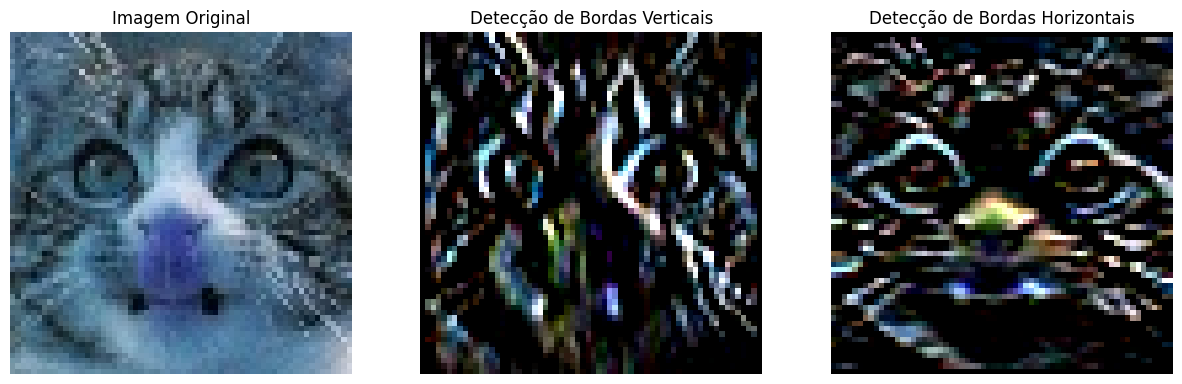

In [63]:
# Função para aplicar filtro de detecção de bordas verticais
def vertical_edge_detector(image):
    # Filtro de Sobel para detecção de bordas verticais
    sobel_filter = np.array([[1, 0, -1],
                              [2, 0, -2],
                              [1, 0, -1]])
    # Aplicando a convolução com o filtro
    filtered_image = cv2.filter2D(image, -1, sobel_filter)
    return filtered_image

# Função para aplicar filtro de detecção de bordas horizontais
def horizontal_edge_detector(image):
    # Filtro de Sobel para detecção de bordas horizontais
    sobel_filter = np.array([[1, 2, 1],
                              [0, 0, 0],
                             [-1, -2, -1]])
    # Aplicando a convolução com o filtro
    filtered_image = cv2.filter2D(image, -1, sobel_filter)
    return filtered_image

# Aplicar os filtros
vertical_edges = vertical_edge_detector(image_64)
horizontal_edges = horizontal_edge_detector(image_64)

# Plotar a imagem original e as imagens filtradas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Imagem Original')
plt.imshow(cv2.cvtColor(image_64, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Detecção de Bordas Verticais')
plt.imshow(cv2.cvtColor(vertical_edges, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Detecção de Bordas Horizontais')
plt.imshow(cv2.cvtColor(horizontal_edges, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

<img src="assets\catt.png" alt="Imagem" width="300"/>

![](assets\rgb-conv.png)

![](assets\multiple-filters.png)

Camadas mais iniciais detectam padrões mais genéricos

Camadas mais profundas detectam padrões mais especificos

![](assets\layers-detection.png)

### Softmax Activation Function

Usada para classificar mais de duas classe (binary classification)

Output layer : 

[

    P(class1 | x), 
    P(class2 | x), 
    P(class3 | x), 
    P(class4 | x), 
    P(class5 | x)
    
]

![](assets\softmax.png)

![](assets\softmax1.png)

---

# Arquiteturas de CNNs Classicas

### LeNet

![](assets\LeNet.png)

### AlexNet

![](assets\AlexNet.png)

### VGG-16

![](assets\vgg16.png)

### Skip Connections

![](assets\residual.png)

### ResNet

![](assets\ResNet1.png)

### 1 x 1 Convolutions

![](assets\1x1conv.png)

Reduzir numero de canais

![](assets\1x1.png)

### U-Net

![](assets\unet.png)

### YOLO

![](assets\yolo.png)

In [67]:
display(HTML('<div style="display: flex; justify-content: space-around;"><img src="assets/thatisall.gif" alt="GIF 1" width="300"/><img src="assets/happy-cat.gif" alt="GIF 2" width="300"/></div>'))

In [75]:
from IPython.display import Audio, display
audio_file = 'assets/Thats All Folks.mp3'
display(Audio(filename=audio_file, autoplay=True))